In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import config

plt.rcParams.update({'font.size': 15})


In [2]:

def import_catalog(file):
    df = pd.read_csv(file)
    df.sort_values(by='first_arrival', inplace=True)
    df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)
    return df

def plot_depths(df, cmap, day):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.scatter(df.arrival_datetime, df.depth, marker='.', linewidth=0, c=df.first_hydrophone, cmap=cmap)
    ax.set_ylabel('day '+str(day))
    ax.set_ylim(400, 50)
    return fig, ax

In [3]:
df141 = import_catalog(file='141precision.csv')
df188 = import_catalog(file='188precision.csv')
df197 = import_catalog(file='197precision.csv')
df211 = import_catalog(file='211precision.csv')


In [4]:
# also need to remove a number of columns that are simply irrelevant to the analysis or untested for a shareable dataset.

columns_to_keep = ['id', 'depth', 'relative_depth',
        'first_hydrophone', 'second_hydrophone',
       'arrival_time', 'first_arrival', 'second_arrival', 'dt',
       'max_amp', 'cum_amp', 'arrival_datetime', 'origin_time']

df141 = df141[columns_to_keep].copy()
df188 = df188[columns_to_keep].copy()
df197 = df197[columns_to_keep].copy()
df211 = df211[columns_to_keep].copy()

df141.sort_values(by='arrival_datetime', inplace=True)
df188.sort_values(by='arrival_datetime', inplace=True)
df197.sort_values(by='arrival_datetime', inplace=True)
df211.sort_values(by='arrival_datetime', inplace=True)

# # removing the events with maximum amplitude <0.1 since they are false positives
df141 = df141[df141.max_amp > 0.5].copy()
df188 = df188[df188.max_amp > 0.5].copy()
df197 = df197[df197.max_amp > 0.5].copy()
df211 = df211[df211.max_amp > 0.5].copy()

df141.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df188.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df197.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df211.drop_duplicates(subset=['arrival_datetime',], inplace=True)

df141 = df141[df141.depth > 160].copy()
df188 = df188[df188.depth > 160].copy()
df197 = df197[df197.depth > 160].copy()
df211 = df211[df211.depth > 160].copy()

amplitude: 273.18656548251727
3535.391999999993
amplitude: 56.95750129387181
4477.459000000003
amplitude: 71.58338982931284
6094.117998999999
amplitude: 557.2534597217959
1570.7299999999998


/localscratch/578545/ipykernel_3733202/645975045.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
/localscratch/578545/ipykernel_3733202/645975045.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
/localscratch/578545/ipykernel_3733202/645975045.py:16: UserWarning: *c* argument looks like a single nu

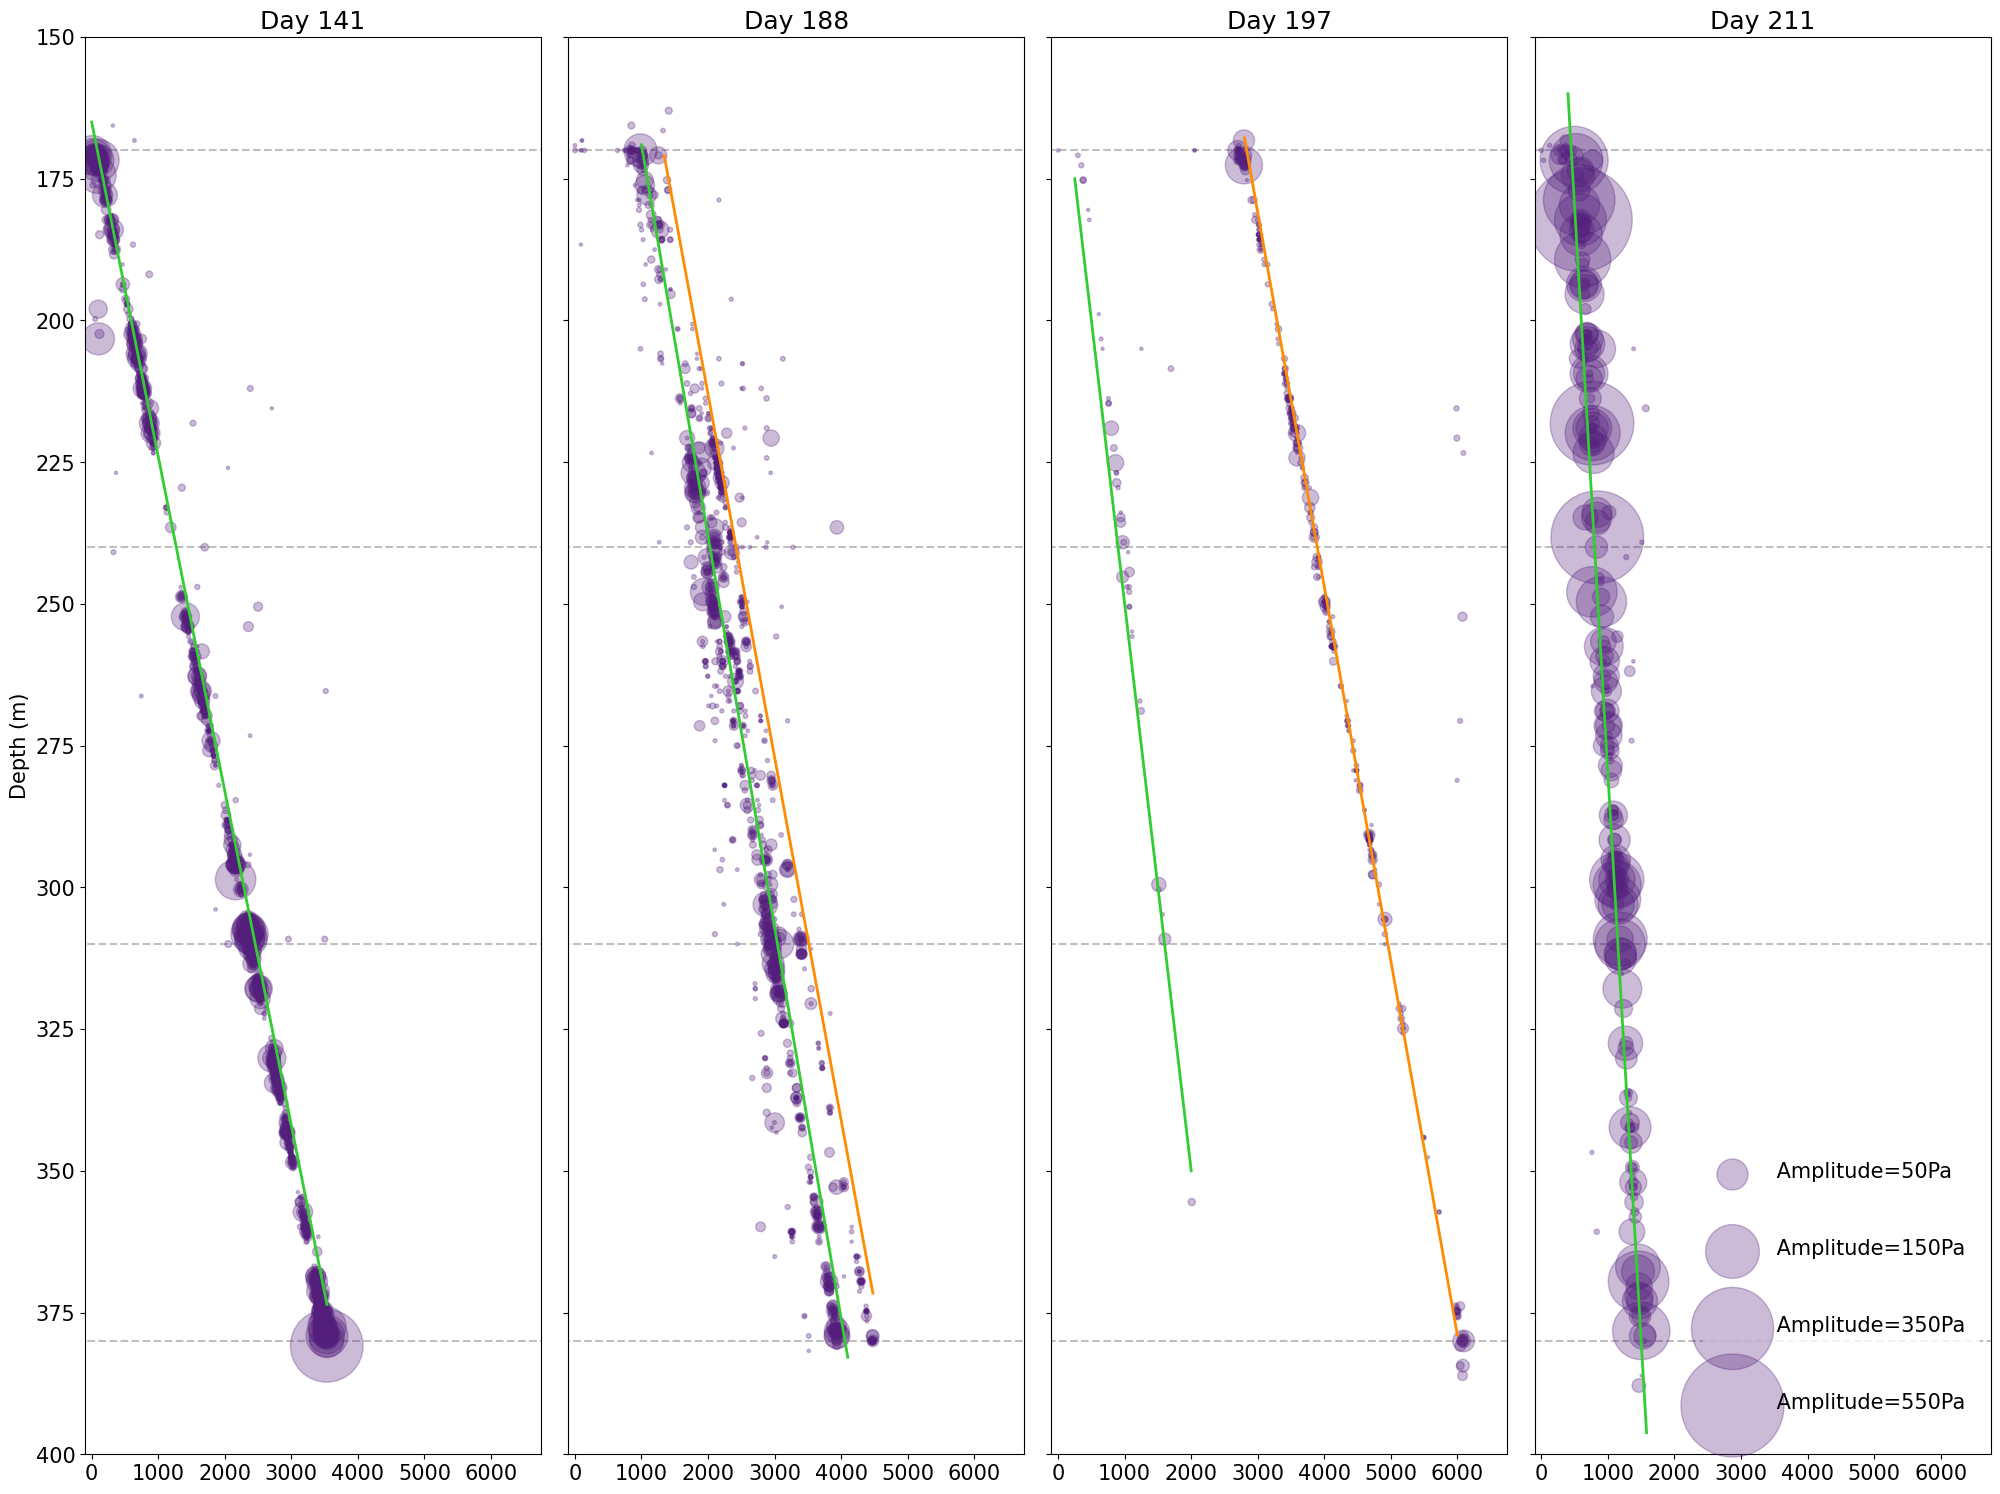

In [14]:
fig, ax = plt.subplots(1, 4, figsize=(20, 15), sharey=True, sharex=True)

ax[3].scatter([0], [0], s=[50*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=50Pa \n')
ax[3].scatter([0], [0], s=[150*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=150Pa \n')
ax[3].scatter([0], [0], s=[350*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=350Pa \n')
ax[3].scatter([0], [0], s=[550*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=550Pa \n')
ax[3].legend(edgecolor='None', loc='lower right')

def plot_events(data, ax):
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values
    y = data['depth'].values
    s = data['max_amp'].values
    print('amplitude:',s.max())
    print(x.max())
    # ax.scatter(x/x.max(), y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    ax.scatter(x, y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    return x.max()

def plot_best_fit_line(slope, intercept, ax, xstart=0, xend=1, **kwargs):
    x = np.linspace(xstart, xend, 1000)
    y = slope * x + intercept
    # ax.plot(x, y, color='limegreen', linewidth=2, **kwargs)
    ax.plot(x, y, linewidth=2, **kwargs)

def plot_hydrophone_depth_horizontal_line(hid, ax):
    hids = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']
    for hid in hids:
        depth = config.hydrophone_metadata_141[hid]['depth']
        ax.hlines(y=depth, xmin=-70000, xmax=700000, linestyle='--', color='black', alpha=0.25, zorder=0)

plot_hydrophone_depth_horizontal_line(hid='h3', ax=ax[0])
plot_hydrophone_depth_horizontal_line(hid='h4', ax=ax[1])
plot_hydrophone_depth_horizontal_line(hid='h5', ax=ax[2])
plot_hydrophone_depth_horizontal_line(hid='h6', ax=ax[3])
    
x141 = plot_events(data=df141, ax=ax[0])
x188 = plot_events(data=df188, ax=ax[1])
x197 = plot_events(data=df197, ax=ax[2])
x211 = plot_events(data=df211, ax=ax[3])

plot_best_fit_line(slope=0.059, intercept=165
                   , ax=ax[0], xstart=0, xend=x141
                  , label=r'$y = 0.059 x + 165$'
                  , color='limegreen')

# plot_best_fit_line(slope=0.071, intercept=115
#                    , ax=ax[1], xstart=0.2*x188, xend=0.8*x188
#                   , label=r'$y = 0.071 x + 115$')

plot_best_fit_line(slope=0.069, intercept=100
                   , ax=ax[1], xstart=1000, xend=4100
                  ,linestyle='-', label=r'$y = 0.069x + 100$'
                  ,color='limegreen')

plot_best_fit_line(slope=0.064, intercept=85
                   , ax=ax[1], xstart=0.3*x188, xend=1*x188
                  ,linestyle='-', label=r'$y = 0.064x + 85$'
                  ,color='darkorange')

plot_best_fit_line(slope=0.1, intercept=150
                   , ax=ax[2], xstart=250, xend=2000
                  ,label=r'$0.1 x + 150$'
                  ,color='limegreen')

plot_best_fit_line(slope=0.066, intercept=-17
                   , ax=ax[2], xstart=2800, xend=6000
                  ,linestyle='-', label=r'$y = 0.066 x - 17$'
                  ,color='darkorange')

plot_best_fit_line(slope=0.2, intercept=80
                   , ax=ax[3], xstart=400, xend=1581
                  ,label=r'$y = 0.2 x + 85$'
                  ,color='limegreen')

ax[0].set_yticks(np.arange(150, 425, 25))
ax[0].set_yticklabels(np.arange(150, 425, 25))
ax[0].set_ylim(400, 150)
ax[0].set_xlim(-100, 6750)
fig.tight_layout()
# ax[0].legend()
# ax[1].legend()
# ax[2].legend()
# ax[3].legend()

ax[0].set_title('Day 141')
ax[1].set_title('Day 188')
ax[2].set_title('Day 197')
ax[3].set_title('Day 211')

ax[0].set_ylabel('Depth (m)')

fig.savefig('fig4.pdf', bbox_inches='tight')